# Importing nessesary libraries

In [1]:
import numpy as np
from tensorflow.keras.layers import Input, Lambda, Dense , Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
IMAGE_SIZE = [230,230]

train_path = 'Downloads\BikeData\Test'
valid_path = 'Downloads\BikeData\Train'

In [4]:
os.path.exists(train_path)

True

In [5]:
os.path.exists(valid_path)

True

In [6]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3],  weights = 'imagenet' , include_top = False)

In [7]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 230, 230, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 236, 236, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 115, 115, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [8]:
## do not train existing weights

for layer in resnet.layers:
    layer.trainabler = False

In [9]:
folders = glob('Downloads\BikeData\Train\*')#to show the how much folders i have

In [10]:
folders

['Downloads\\BikeData\\Train\\bmw',
 'Downloads\\BikeData\\Train\\harley',
 'Downloads\\BikeData\\Train\\kawasaki']

In [11]:
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders),activation = 'softmax')(x)

##create a model 
from keras.models import Model
model = Model(inputs=resnet.input,outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 230, 230, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 236, 236, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 115, 115, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [14]:
model.compile(
              loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [15]:
## using image data generater to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

#never do data augumentaion in test data
test_datagen = ImageDataGenerator(rescale = 1./255)  

In [16]:
training_set = train_datagen.flow_from_directory('Downloads\BikeData\Train',
                                                target_size = (230,230),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Downloads\BikeData\Test',
                                           target_size = (230,230),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 59 images belonging to 3 classes.


In [18]:
## model fitting

r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch=len(training_set),
    validation_steps = len(test_set))

Epoch 1/50
2/2 [==============================] - 40s 19s/step - loss: 2.4899 - accuracy: 0.3750 - val_loss: 75.8630 - val_accuracy: 0.3390
Epoch 2/50
2/2 [==============================] - 33s 19s/step - loss: 8.4675 - accuracy: 0.6875 - val_loss: 93.1994 - val_accuracy: 0.5085
Epoch 3/50
2/2 [==============================] - 32s 19s/step - loss: 4.3672 - accuracy: 0.8125 - val_loss: 7.5589 - val_accuracy: 0.5085
Epoch 4/50
2/2 [==============================] - 34s 21s/step - loss: 2.2857 - accuracy: 0.8750 - val_loss: 9.0744 - val_accuracy: 0.3390
Epoch 5/50
2/2 [==============================] - 37s 21s/step - loss: 2.7902 - accuracy: 0.8906 - val_loss: 44.2922 - val_accuracy: 0.3220
Epoch 6/50
2/2 [==============================] - 32s 18s/step - loss: 0.9345 - accuracy: 0.8906 - val_loss: 415.5563 - val_accuracy: 0.3390
Epoch 7/50
2/2 [==============================] - 35s 22s/step - loss: 0.8608 - accuracy: 0.8906 - val_loss: 4625.1919 - val_accuracy: 0.3390
Epoch 8/50
2/2 [===

In [19]:
r.history

{'loss': [2.48992919921875,
  8.467500686645508,
  4.367244720458984,
  2.2856953144073486,
  2.7902300357818604,
  0.9345431923866272,
  0.8608425855636597,
  0.42035847902297974,
  1.3249952793121338,
  2.2305238246917725,
  0.6659594178199768,
  3.874315023422241,
  5.672022342681885,
  0.7954744100570679,
  5.559659004211426,
  1.5112465620040894,
  7.526340961456299,
  5.396446228027344,
  3.5877678394317627,
  1.3951669931411743,
  1.5864472389221191,
  1.3505598306655884,
  1.2836952209472656,
  2.2799389362335205,
  1.6495258808135986,
  0.1948111355304718,
  0.6686123609542847,
  3.9820637702941895,
  0.5989032983779907,
  0.7090933918952942,
  0.38209134340286255,
  0.623781681060791,
  0.6846925616264343,
  0.2130005657672882,
  0.10373295843601227,
  0.8367065191268921,
  0.8025429248809814,
  1.982245922088623,
  1.5831116437911987,
  1.790984869003296,
  0.16819645464420319,
  7.580916881561279,
  4.858067989349365,
  2.8522956371307373,
  3.4023079872131348,
  2.09737324

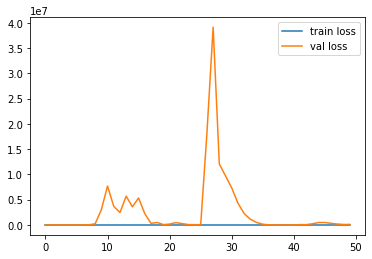

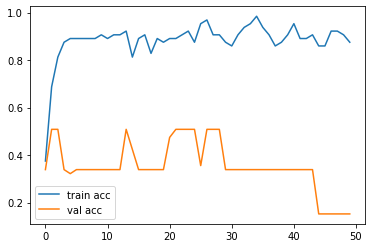

<Figure size 432x288 with 0 Axes>

In [20]:
## loss

plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

##accuracy

plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
model.save('model_resnet50.h5')#h5 is file

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [24]:
y_pred = np.argmax(y_pred,axis=1)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('model_resnet50.h5')

In [27]:
model

In [28]:
#!pip install pillow

In [34]:
from PIL import Image
img = image.load_img('Downloads/BikeData/Test/harley/41.jpg',target_size = (230,230))

In [35]:
image

<module 'tensorflow.keras.preprocessing.image' from 'C:\\Users\\Admin\\AppData\\Roaming\\Python\\Python38\\site-packages\\keras\\api\\_v2\\keras\\preprocessing\\image\\__init__.py'>

In [36]:
x=image.img_to_array(img)
x

array([[[166., 166., 164.],
        [167., 167., 165.],
        [167., 167., 165.],
        ...,
        [175., 173., 174.],
        [175., 173., 174.],
        [174., 172., 173.]],

       [[167., 167., 165.],
        [167., 167., 165.],
        [168., 168., 166.],
        ...,
        [175., 173., 174.],
        [175., 173., 174.],
        [174., 172., 173.]],

       [[167., 167., 165.],
        [167., 167., 165.],
        [168., 168., 166.],
        ...,
        [175., 173., 174.],
        [175., 173., 174.],
        [174., 172., 173.]],

       ...,

       [[238., 238., 238.],
        [238., 238., 238.],
        [238., 238., 238.],
        ...,
        [231., 225., 225.],
        [231., 225., 225.],
        [231., 225., 225.]],

       [[238., 238., 238.],
        [238., 238., 238.],
        [238., 238., 238.],
        ...,
        [231., 225., 225.],
        [231., 225., 225.],
        [231., 225., 225.]],

       [[237., 237., 237.],
        [237., 237., 237.],
        [237., 2

In [37]:
x.shape

(230, 230, 3)

In [38]:
x=x/255
x

array([[[0.6509804 , 0.6509804 , 0.6431373 ],
        [0.654902  , 0.654902  , 0.64705884],
        [0.654902  , 0.654902  , 0.64705884],
        ...,
        [0.6862745 , 0.6784314 , 0.68235296],
        [0.6862745 , 0.6784314 , 0.68235296],
        [0.68235296, 0.6745098 , 0.6784314 ]],

       [[0.654902  , 0.654902  , 0.64705884],
        [0.654902  , 0.654902  , 0.64705884],
        [0.65882355, 0.65882355, 0.6509804 ],
        ...,
        [0.6862745 , 0.6784314 , 0.68235296],
        [0.6862745 , 0.6784314 , 0.68235296],
        [0.68235296, 0.6745098 , 0.6784314 ]],

       [[0.654902  , 0.654902  , 0.64705884],
        [0.654902  , 0.654902  , 0.64705884],
        [0.65882355, 0.65882355, 0.6509804 ],
        ...,
        [0.6862745 , 0.6784314 , 0.68235296],
        [0.6862745 , 0.6784314 , 0.68235296],
        [0.68235296, 0.6745098 , 0.6784314 ]],

       ...,

       [[0.93333334, 0.93333334, 0.93333334],
        [0.93333334, 0.93333334, 0.93333334],
        [0.93333334, 0

In [39]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 230, 230, 3)

In [40]:
img_data

array([[[[-103.29587 , -116.12802 , -123.02902 ],
         [-103.29195 , -116.1241  , -123.0251  ],
         [-103.29195 , -116.1241  , -123.0251  ],
         ...,
         [-103.25665 , -116.10057 , -122.99373 ],
         [-103.25665 , -116.10057 , -122.99373 ],
         [-103.260574, -116.10449 , -122.99765 ]],

        [[-103.29195 , -116.1241  , -123.0251  ],
         [-103.29195 , -116.1241  , -123.0251  ],
         [-103.288025, -116.12018 , -123.02118 ],
         ...,
         [-103.25665 , -116.10057 , -122.99373 ],
         [-103.25665 , -116.10057 , -122.99373 ],
         [-103.260574, -116.10449 , -122.99765 ]],

        [[-103.29195 , -116.1241  , -123.0251  ],
         [-103.29195 , -116.1241  , -123.0251  ],
         [-103.288025, -116.12018 , -123.02118 ],
         ...,
         [-103.25665 , -116.10057 , -122.99373 ],
         [-103.25665 , -116.10057 , -122.99373 ],
         [-103.260574, -116.10449 , -122.99765 ]],

        ...,

        [[-103.00567 , -115.845665, -1

In [41]:
model.predict(img_data)

array([[1., 0., 0.]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data),axis=1)

In [43]:
a

array([0], dtype=int64)